## 1. Define the Context and Scope of the Project
  ### Project Goals and Objectives:

        •	The goal is to classify ECG signals into different categories using deep learning techniques.

        •	We will work with the MIT-BIH Arrhythmia dataset and Physionet's PTB Diagnostic ECG Database.




In [ ]:
#Read data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import os


# Load the datasets
mitbih_train = pd.read_csv('F:/course/my_project/Heart/Data/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('F:/course/my_project/Heart/Data/mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('F:/course/my_project/Heart/Data/ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('F:/course/my_project/Heart/Data/ptbdb_normal.csv', header=None)

# Now you can proceed with your analysis using the loaded datasets

## 2. Data Audit
We'll fill out the data audit template for the MIT-BIH and PTBDB datasets.

In [4]:
# Initialize a list to hold the audit data

# Function to generate the data audit table for a given dataset
def generate_data_audit(dataset, dataset_name):
    audit_data = []
    for col in dataset.columns:
        col_data = {
            '# Column': col,
            'Name of the Column': f'Feature {col}' if col < dataset.shape[1] - 1 else 'Label',
            'Variable\'s type': 'Feature' if col < dataset.shape[1] - 1 else 'Target',
            'Description': f'ECG signal feature {col + 1}' if col < dataset.shape[1] - 1 else 'ECG class label',
            'Is the variable available before prediction': 'Yes' if col < dataset.shape[1] - 1 else 'No',
            'Variable\'s type (detailed)': dataset.dtypes[col],
            'Percentage of missing values': f"{dataset[col].isnull().mean() * 100:.2f}%",
            'Categorical / Quantitative': 'Quantitative' if col < dataset.shape[1] - 1 else 'Categorical'
        }
        audit_data.append(col_data)
    audit_df = pd.DataFrame(audit_data)
    print(f"\nData Audit for {dataset_name} Dataset")
    print(audit_df)
    print("\n")

# Generate data audit tables for all datasets
generate_data_audit(mitbih_train, "MIT-BIH Train")
generate_data_audit(mitbih_test, "MIT-BIH Test")
generate_data_audit(ptbdb_normal, "PTBDB Normal")
generate_data_audit(ptbdb_abnormal, "PTBDB Abnormal")


Data Audit for MIT-BIH Train Dataset
     # Column Name of the Column Variable's type             Description  \
0           0          Feature 0         Feature    ECG signal feature 1   
1           1          Feature 1         Feature    ECG signal feature 2   
2           2          Feature 2         Feature    ECG signal feature 3   
3           3          Feature 3         Feature    ECG signal feature 4   
4           4          Feature 4         Feature    ECG signal feature 5   
..        ...                ...             ...                     ...   
183       183        Feature 183         Feature  ECG signal feature 184   
184       184        Feature 184         Feature  ECG signal feature 185   
185       185        Feature 185         Feature  ECG signal feature 186   
186       186        Feature 186         Feature  ECG signal feature 187   
187       187              Label          Target         ECG class label   

    Is the variable available before prediction V

## 3. Graphical Representations
We 'll create the following visualizations for both the MIT-BIH and PTBDB datasets:

    1. Class Distribution
    2. Correlation Matrix
    3. Add your visualizations titles

### 1.Class Distribution

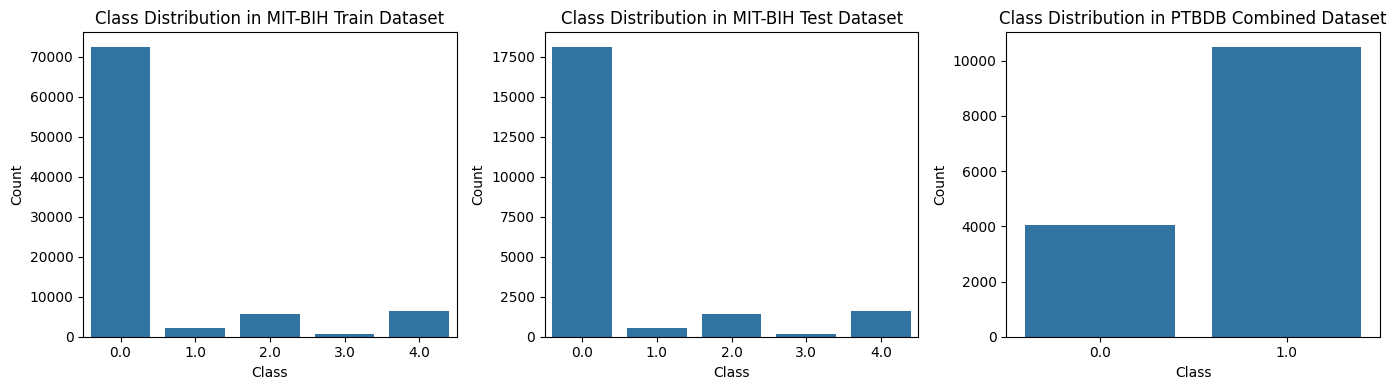

In [5]:
# Combine PTBDB datasets
ptbdb_combined = pd.concat([ptbdb_normal, ptbdb_abnormal])

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot class distribution for MIT-BIH Train Dataset
sns.countplot(x=mitbih_train[187], ax=axes[0])
axes[0].set_title('Class Distribution in MIT-BIH Train Dataset')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot class distribution for MIT-BIH Test Dataset
sns.countplot(x=mitbih_test[187], ax=axes[1])
axes[1].set_title('Class Distribution in MIT-BIH Test Dataset')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Plot class distribution for PTBDB Combined Dataset
sns.countplot(x=ptbdb_combined[187], ax=axes[2])
axes[2].set_title('Class Distribution in PTBDB Combined Dataset')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()

The figure presents the class distribution for two heartbeat datasets: MIT-BIH Train and MIT-BIH Test. The classes are labeled as N (Normal), S (Supraventricular ectopic beat), V (Ventricular ectopic beat), F (Fusion of ventricular and normal beat), and Q (Unclassifiable beat).
The MIT-BIH Train dataset is heavily skewed towards the Normal (N) class, which constitutes the majority of the dataset. There is a notable presence of V and Q classes, while the S and F classes are underrepresented. Similarly, the MIT-BIH Test dataset shows the Normal (N) class as the most dominant. The distribution of other classes (S, V, F, Q) is consistent with the training dataset, indicating a balanced representation between training and testing data.

The class imbalance, particularly the dominance of the Normal (N) class, can affect model training. Models may become biased towards the majority class, potentially leading to poor performance in detecting minority classes. Ensuring balanced representation or using techniques such as class weighting or oversampling can help mitigate this issue, leading to more robust and accurate diagnostic models. Given the skewed distribution, more resources may need to be allocated to improve the detection of less represented classes (S, V, F, Q). This focus is critical for developing comprehensive diagnostic tools that can accurately identify all types of heartbeats.
Accurate and balanced detection of all heartbeat types is crucial for reliable patient diagnosis and care. The skewed distributions highlight the need for targeted efforts to improve the detection of rare but clinically significant heartbeats. Enhanced diagnostic tools can lead to better patient outcomes by enabling timely and accurate identification of various cardiac conditions, reducing the risk of misdiagnosis.

To address class imbalance, it is recommended to implement techniques such as class weighting, oversampling of minority classes, or undersampling of the majority class in the MIT-BIH datasets. Data augmentation methods can also be considered to increase the representation of underrepresented classes. Developing and training models specifically tailored to improve the detection of less represented classes (S, V, F, Q) ensures a comprehensive diagnostic approach. Utilizing ensemble methods to combine different models can enhance overall performance and accuracy. Further research should be conducted to understand the clinical significance of each class and its impact on patient outcomes. Investing in advanced diagnostic tools that leverage the balanced detection of all classes can improve overall healthcare delivery.

By addressing class imbalances and focusing on improving diagnostic capabilities for all heartbeat types, healthcare organizations can enhance their data-driven strategies, leading to better diagnostic solutions, cost efficiencies, and improved patient outcomes.


### 2. Correlation Matrix

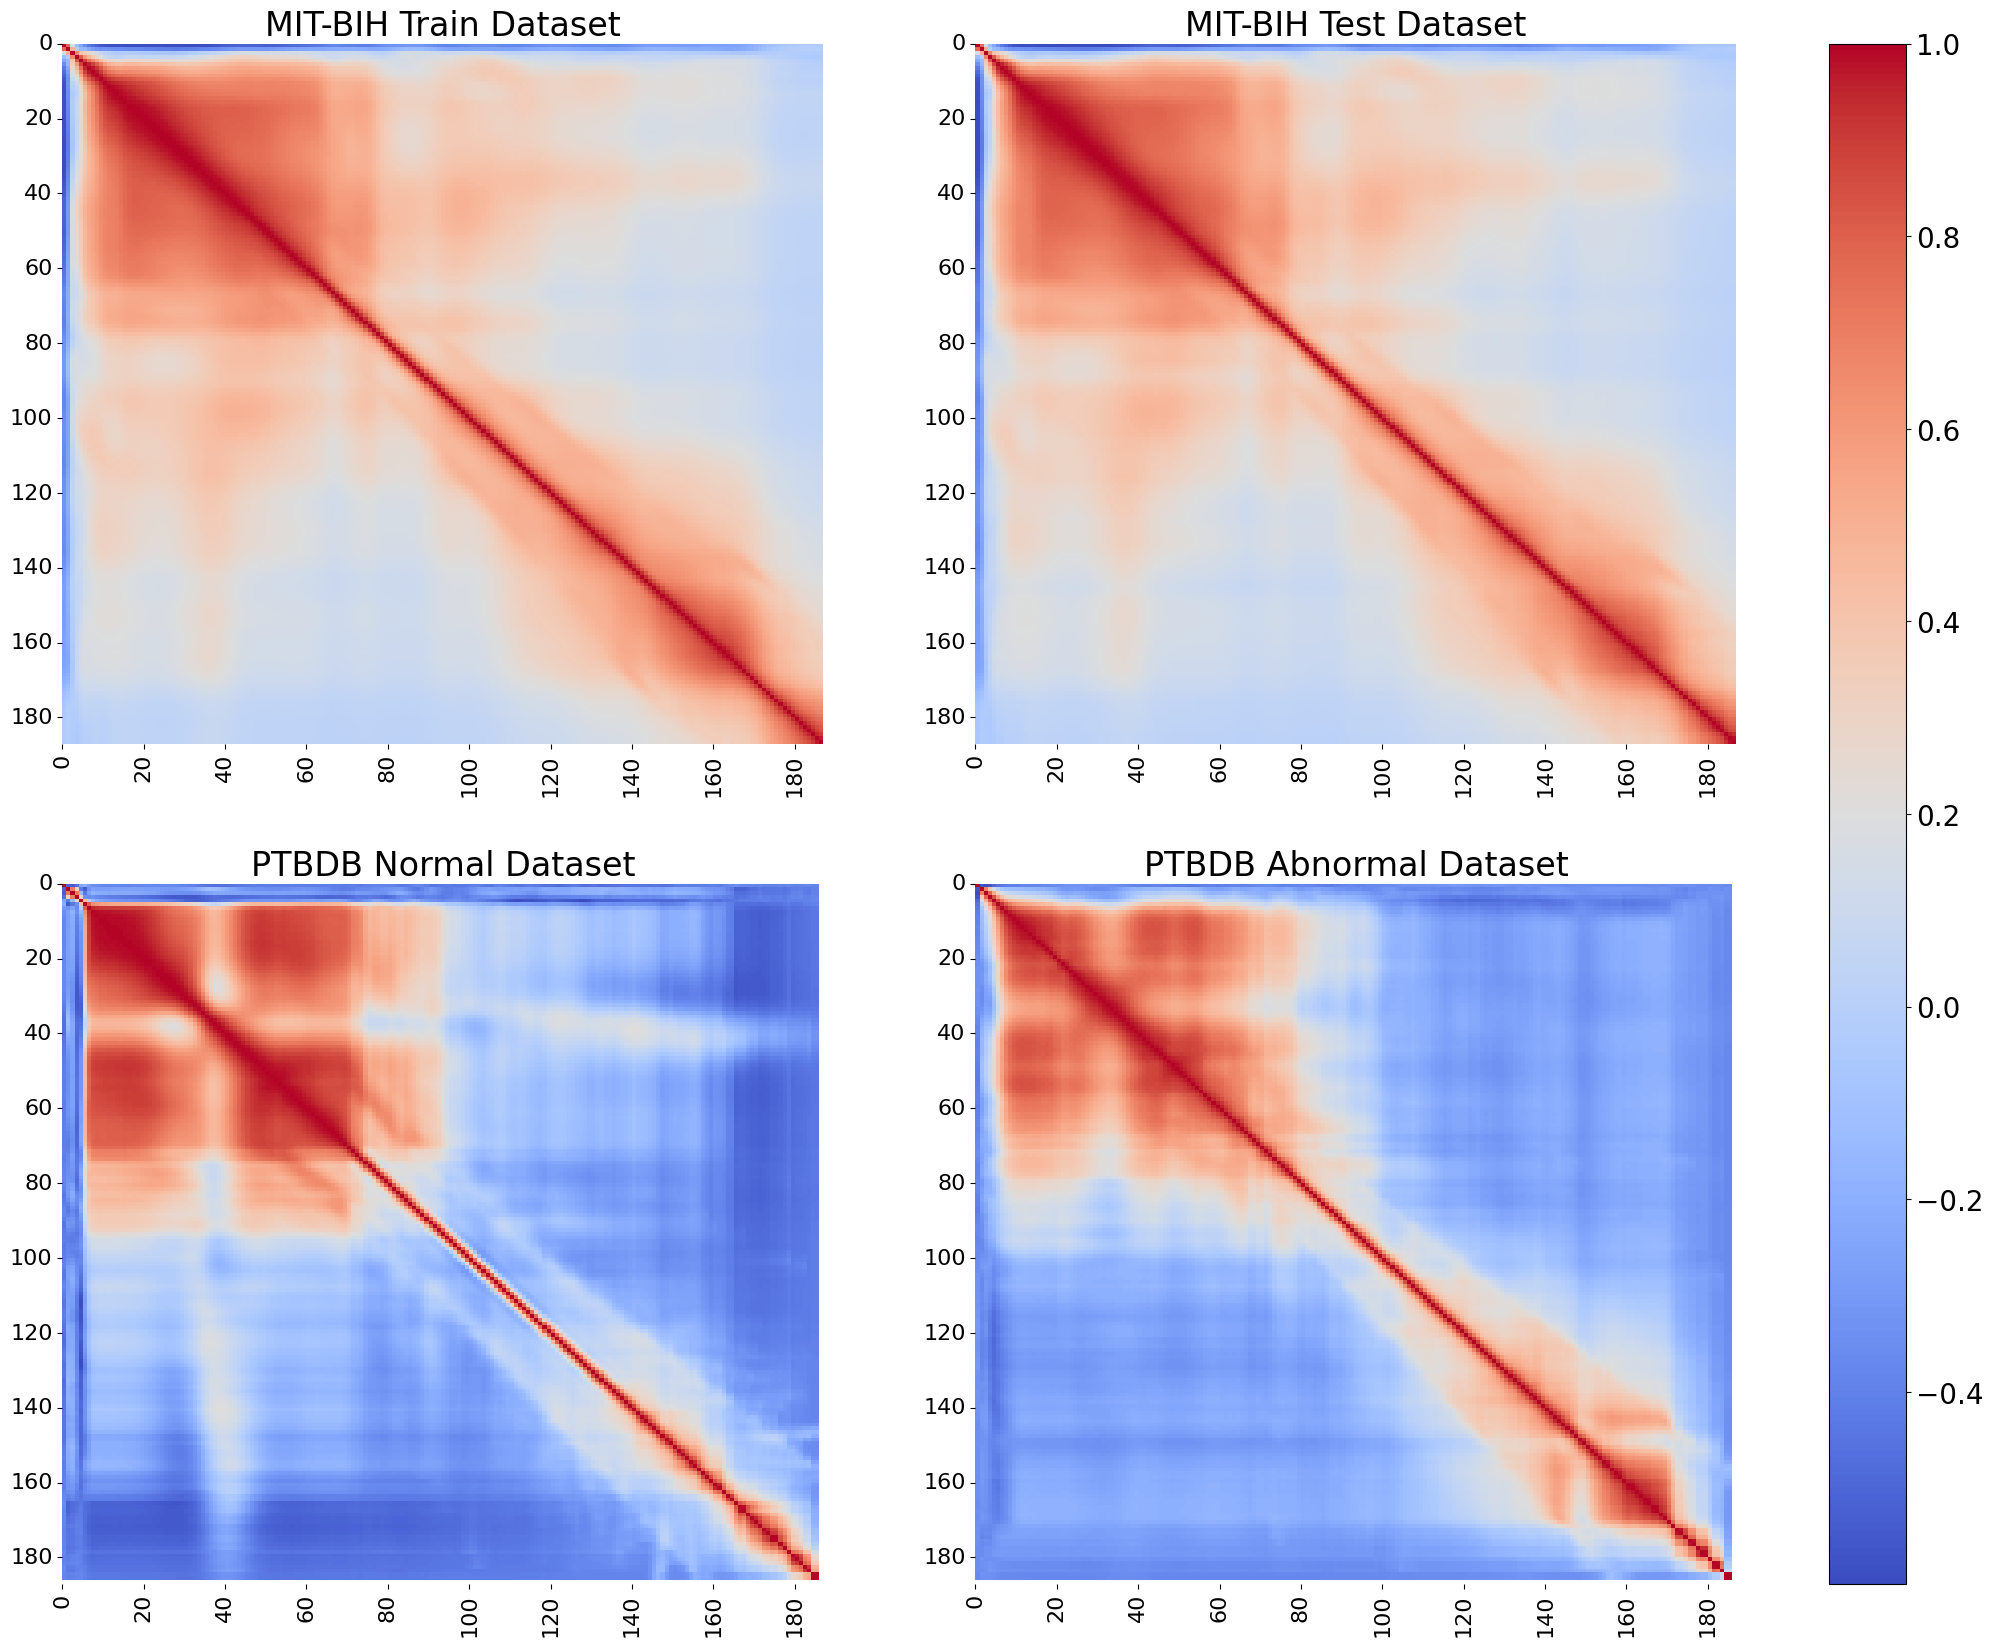

In [6]:
# Compute correlation matrices
corr_mitbih_train = mitbih_train.iloc[:, :-1].corr()
corr_mitbih_test = mitbih_test.iloc[:, :-1].corr()
corr_ptbdb_normal = ptbdb_normal.iloc[:, :-1].corr()
corr_ptbdb_abnormal = ptbdb_abnormal.iloc[:, :-1].corr()



fig, axes = plt.subplots(2, 2, figsize=(24, 20))
# Function to adjust tick labels
def set_ticks(ax, num_features):
    ax.set_xticks(range(0, num_features, 20))
    ax.set_xticklabels(range(0, num_features, 20), fontsize=16, rotation=90)
    ax.set_yticks(range(0, num_features, 20))
    ax.set_yticklabels(range(0, num_features, 20), fontsize=16)

# Plot MIT-BIH Train Dataset Correlation Matrix
sns.heatmap(corr_mitbih_train, annot=False, cmap='coolwarm', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('MIT-BIH Train Dataset', fontsize=24)
set_ticks(axes[0, 0], mitbih_train.shape[1] - 1)

# Plot MIT-BIH Test Dataset Correlation Matrix
sns.heatmap(corr_mitbih_test, annot=False, cmap='coolwarm', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('MIT-BIH Test Dataset', fontsize=24)
set_ticks(axes[0, 1], mitbih_test.shape[1] - 1)

# Plot PTBDB Normal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_normal, annot=False, cmap='coolwarm', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('PTBDB Normal Dataset', fontsize=24)
set_ticks(axes[1, 0], ptbdb_normal.shape[1] - 1)

# Plot PTBDB Abnormal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_abnormal, annot=False, cmap='coolwarm', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('PTBDB Abnormal Dataset', fontsize=24)
set_ticks(axes[1, 1], ptbdb_abnormal.shape[1] - 1)

# Add a single colorbar for the entire figure
# Adjust colorbar tick size
cbar = fig.colorbar(axes[0, 0].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.05)
cbar.ax.tick_params(labelsize=20)


plt.show()

The figure presents correlation matrices for four heartbeat datasets: MIT-BIH Train, MIT-BIH Test, PTBDB Normal, and PTBDB Abnormal. The color gradient from blue to red indicates the strength of these correlations.

The MIT-BIH Train and Test datasets show similar correlation patterns, suggesting consistency between training and testing data, which is crucial for developing reliable predictive models. The strong diagonal correlations indicate that features are more strongly correlated with themselves, as expected. The PTBDB Normal dataset shows lower overall correlations, while the PTBDB Abnormal dataset displays higher correlations, indicating more pronounced and interrelated features in abnormal heartbeats.

These insights can refine diagnostic algorithms, making them more adept at distinguishing between normal and abnormal heartbeats, thereby reducing misdiagnosis and improving patient outcomes. By focusing on highly correlated features in the abnormal dataset, healthcare providers can streamline data processing, leading to significant cost savings and increased efficiency. More accurate diagnostics can lead to quicker and more reliable patient outcomes, enhancing overall patient care and satisfaction.

Based on this analysis, it is recommended to reduce dimensionality by focusing on highly correlated features within the abnormal dataset. This can streamline the model without compromising its diagnostic power, improving both efficiency and accuracy. Additionally, leveraging these correlation insights during model training will ensure that the model learns the most significant patterns for both normal and abnormal heartbeats, leading to better generalization and predictive performance. Further research should be conducted to understand the underlying reasons for the observed correlations, potentially uncovering new biomarkers for heart conditions and leading to the development of even more effective diagnostic tools.

By translating these technical findings into actionable business insights, healthcare organizations can enhance their data-driven strategies, leading to improved diagnostic solutions, cost efficiencies, and better patient outcomes.
